# Machine Learning 
    1. Supervised Learning
        a. Regression
            1. Linear (Continuous data, like Car Prices or Temprature)433iu l6789
            2. Logistic(Two value, True/False, Binary values)
        b. Classification(Data is in multiple categories, like food type(chilli, tangy. sweet), color (red, green, blue)
    2. Unsupervised 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')


In [2]:
data=load_breast_cancer()

In [3]:
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [4]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [5]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [6]:
data.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [7]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [8]:
data.DESCR

'.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry \n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        largest values) of these features were computed for each image,\n        resulting in 30 features.  For instance,

In [9]:
cancer_data=pd.DataFrame(data.data)

In [10]:
cancer_data

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [11]:
cancer_target = pd.DataFrame(data.target)

In [12]:
cancer_target

,0
0,0
1,0
2,0
3,0
4,0
...,...
564,0
565,0
566,0
567,0


In [13]:
x = cancer_data
x

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [14]:
y = data.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [15]:
x.shape

(569, 30)

In [16]:
y.shape

(569,)

In [17]:
y=y.reshape(-1,1)

In [18]:
#Random _state 42 means 42% data will be used in training.changing this value will give new set of train to train the model,
#in this we may get different accuracy score , chnage this value and run all below cells again to see differences. 
                                                                                

train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.22,random_state=58)  





In [19]:
train_x.shape

(443, 30)

In [20]:
train_y.shape

(443, 1)

In [21]:
test_x.shape

(126, 30)

In [22]:
test_y.shape

(126, 1)

In [23]:
lg=LogisticRegression()

In [24]:
lg.fit(train_x,train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
pred = lg.predict(test_x)
print(pred)

[1 0 1 0 0 0 0 1 1 1 1 0 1 1 1 1 0 0 0 1 1 1 1 1 0 1 1 0 1 1 1 0 1 0 1 1 1
 0 0 1 0 1 1 1 0 1 0 1 1 1 0 1 0 0 1 0 0 1 1 1 0 1 1 1 1 0 1 0 0 0 0 1 0 0
 1 0 0 1 1 0 0 1 0 0 1 1 1 1 0 0 1 1 0 1 1 1 0 1 1 1 0 0 0 0 1 1 0 1 0 1 0
 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0]


In [26]:
print("accuracy_score:",accuracy_score(test_y,pred))

accuracy_score: 0.9761904761904762


In [27]:
print(confusion_matrix(test_y,pred))

[[49  1]
 [ 2 74]]


In [28]:
print(classification_report(test_y,pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        50
           1       0.99      0.97      0.98        76

    accuracy                           0.98       126
   macro avg       0.97      0.98      0.98       126
weighted avg       0.98      0.98      0.98       126



In [29]:
#https://archive.ics.uci.edu/ml/index.php

# AUC ROC CURVE
AUC ---> Area Under the curve

ROC --->Reciever Operating Charectristic

In [74]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

In [76]:
y_pred_prob=lg.predict_proba(test_x)[:,1]

In [77]:
y_pred_prob

array([9.97712263e-01, 2.53337906e-08, 9.80087084e-01, 1.62943975e-05,
       3.07447439e-01, 1.30426897e-01, 1.75625907e-01, 9.81456229e-01,
       9.98308354e-01, 9.92721621e-01, 9.94128744e-01, 1.06568932e-06,
       9.84274144e-01, 9.93537593e-01, 9.95345511e-01, 9.92194745e-01,
       4.64389743e-08, 6.35806714e-09, 4.78078637e-02, 9.99864058e-01,
       8.62678353e-01, 9.93846600e-01, 7.58111989e-01, 9.93338466e-01,
       1.19529928e-45, 9.54668970e-01, 8.60200823e-01, 2.27351865e-19,
       9.98025207e-01, 9.85107386e-01, 9.40630312e-01, 9.73926020e-15,
       9.85084467e-01, 4.60637138e-02, 9.94303623e-01, 9.96080791e-01,
       9.30277770e-01, 3.95691145e-01, 4.79119876e-04, 9.89240791e-01,
       2.94119666e-03, 9.64652492e-01, 9.85953442e-01, 9.81471667e-01,
       1.01204698e-01, 9.91972935e-01, 1.58347334e-06, 9.95895705e-01,
       9.96055843e-01, 9.85582975e-01, 1.85430967e-02, 7.90823915e-01,
       2.43870375e-05, 4.60864158e-04, 8.43618420e-01, 5.74873064e-15,
      

In [79]:
fpr,tpr,thresholds=roc_curve(test_y,y_pred_prob)

In [81]:
fpr

array([0.  , 0.  , 0.  , 0.02, 0.02, 1.  ])

In [83]:
tpr

array([0.        , 0.01315789, 0.94736842, 0.94736842, 1.        ,
       1.        ])

In [84]:
thresholds

array([1.99986406e+00, 9.99864058e-01, 7.90823915e-01, 7.63959788e-01,
       3.95691145e-01, 1.19529928e-45])

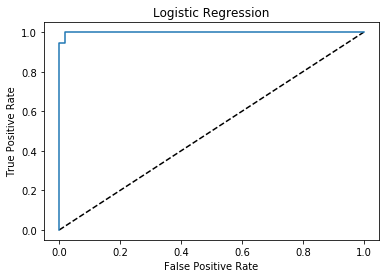

In [86]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label="Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistic Regression")
plt.show()

In [88]:
auc_score=roc_auc_score(test_y,lg.predict(test_x))

In [90]:
print(auc_score)

0.976842105263158


In [107]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(train_x,train_y)
p =dt.predict(test_x)
print(accuracy_score(test_y,p))

0.9523809523809523


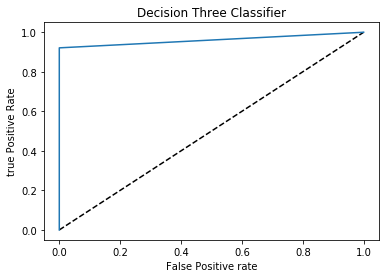

0.9605263157894737

In [110]:
#Decision Tree curve
y_pred_prob=dt.predict_proba(test_x)[:,1]
fpr,tpr,thresholds=roc_curve(test_y,y_pred_prob)
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label="Decision Tree Classifier")
plt.xlabel("False Positive rate")
plt.ylabel("true Positive Rate")
plt.title("Decision Three Classifier")
plt.show()
auc_score=roc_auc_score(test_y,dt.predict(test_x))
auc_score

# Concret Data Set ML

In [30]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sb

In [31]:
ds = pd.read_csv('concrete_data.csv')

In [32]:
data = pd.DataFrame(data=ds)

In [33]:
data.shape

(1030, 9)

In [34]:
data.dtypes

Cement (component 1)(kg in a m^3 mixture)                float64
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    float64
Fly Ash (component 3)(kg in a m^3 mixture)               float64
Water  (component 4)(kg in a m^3 mixture)                float64
Superplasticizer (component 5)(kg in a m^3 mixture)      float64
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     float64
Fine Aggregate (component 7)(kg in a m^3 mixture)        float64
Age                                                        int64
Concrete compressive strength(MPa, megapascals)          float64
dtype: object

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age                                                    1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [36]:
data.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [37]:
data.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age,"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


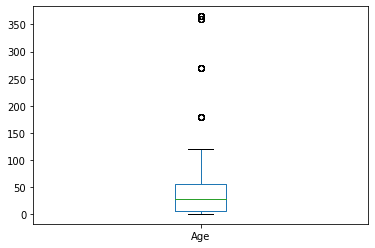

In [38]:
data['Age'].plot.box()

In [39]:
#data.plot?

Cement (component 1)(kg in a m^3 mixture)                   AxesSubplot(0.125,0.536818;0.133621x0.343182)
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    AxesSubplot(0.285345,0.536818;0.133621x0.343182)
Fly Ash (component 3)(kg in a m^3 mixture)                AxesSubplot(0.44569,0.536818;0.133621x0.343182)
Water  (component 4)(kg in a m^3 mixture)                AxesSubplot(0.606034,0.536818;0.133621x0.343182)
Superplasticizer (component 5)(kg in a m^3 mixture)      AxesSubplot(0.766379,0.536818;0.133621x0.343182)
Coarse Aggregate  (component 6)(kg in a m^3 mixture)           AxesSubplot(0.125,0.125;0.133621x0.343182)
Fine Aggregate (component 7)(kg in a m^3 mixture)           AxesSubplot(0.285345,0.125;0.133621x0.343182)
Age                                                          AxesSubplot(0.44569,0.125;0.133621x0.343182)
Concrete compressive strength(MPa, megapascals)             AxesSubplot(0.606034,0.125;0.133621x0.343182)
dtype: object

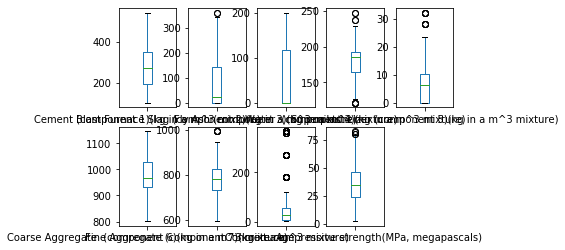

In [40]:
data.plot(kind='box',subplots='True',layout=(2,5))

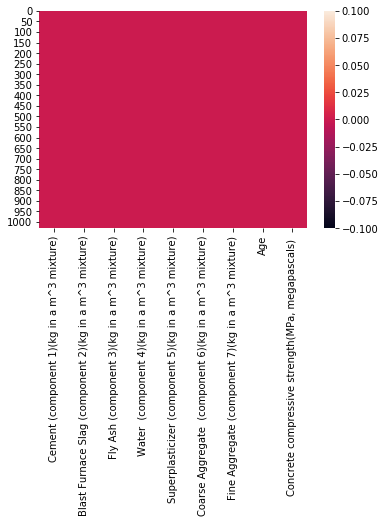

In [41]:
sb.heatmap(data.isnull())

In [42]:
import numpy as np

In [43]:
data['Age']=np.log(data['Age'])

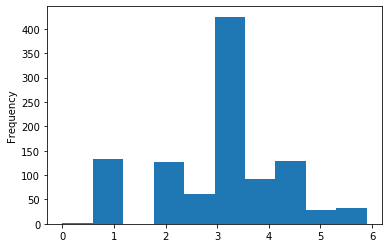

In [44]:
data['Age'].plot.hist()

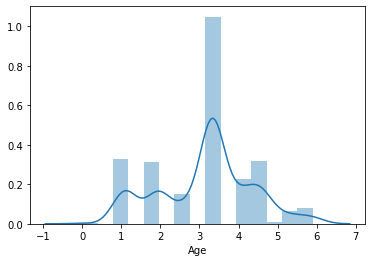

In [45]:
#sb.distplot?
sb.distplot(data['Age'])

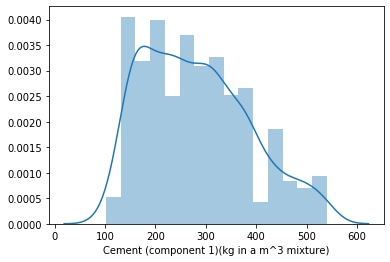

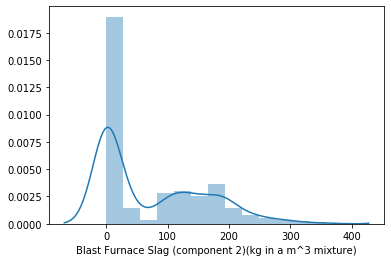

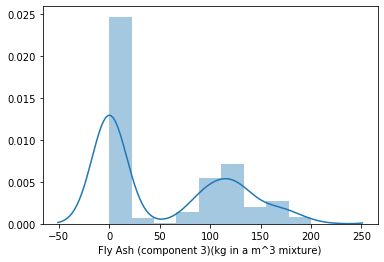

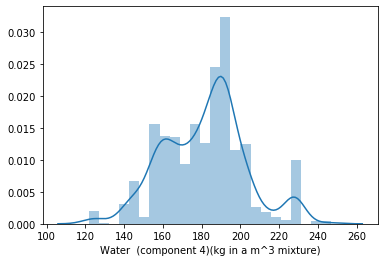

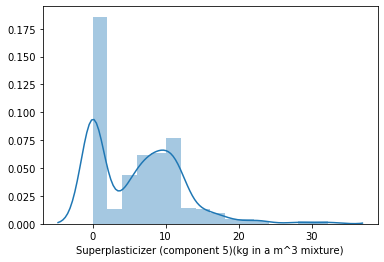

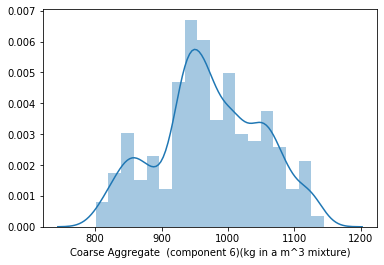

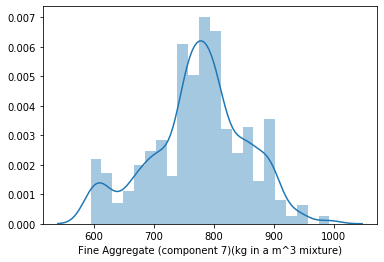

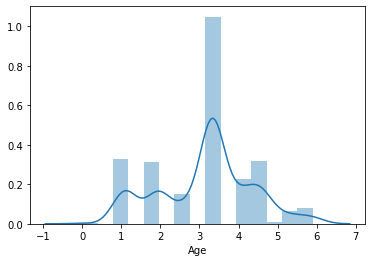

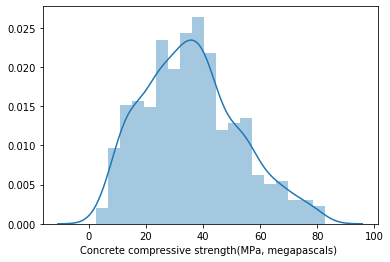

In [46]:
for i in data.columns:
    plt.figure()
    sb.distplot(data[i])

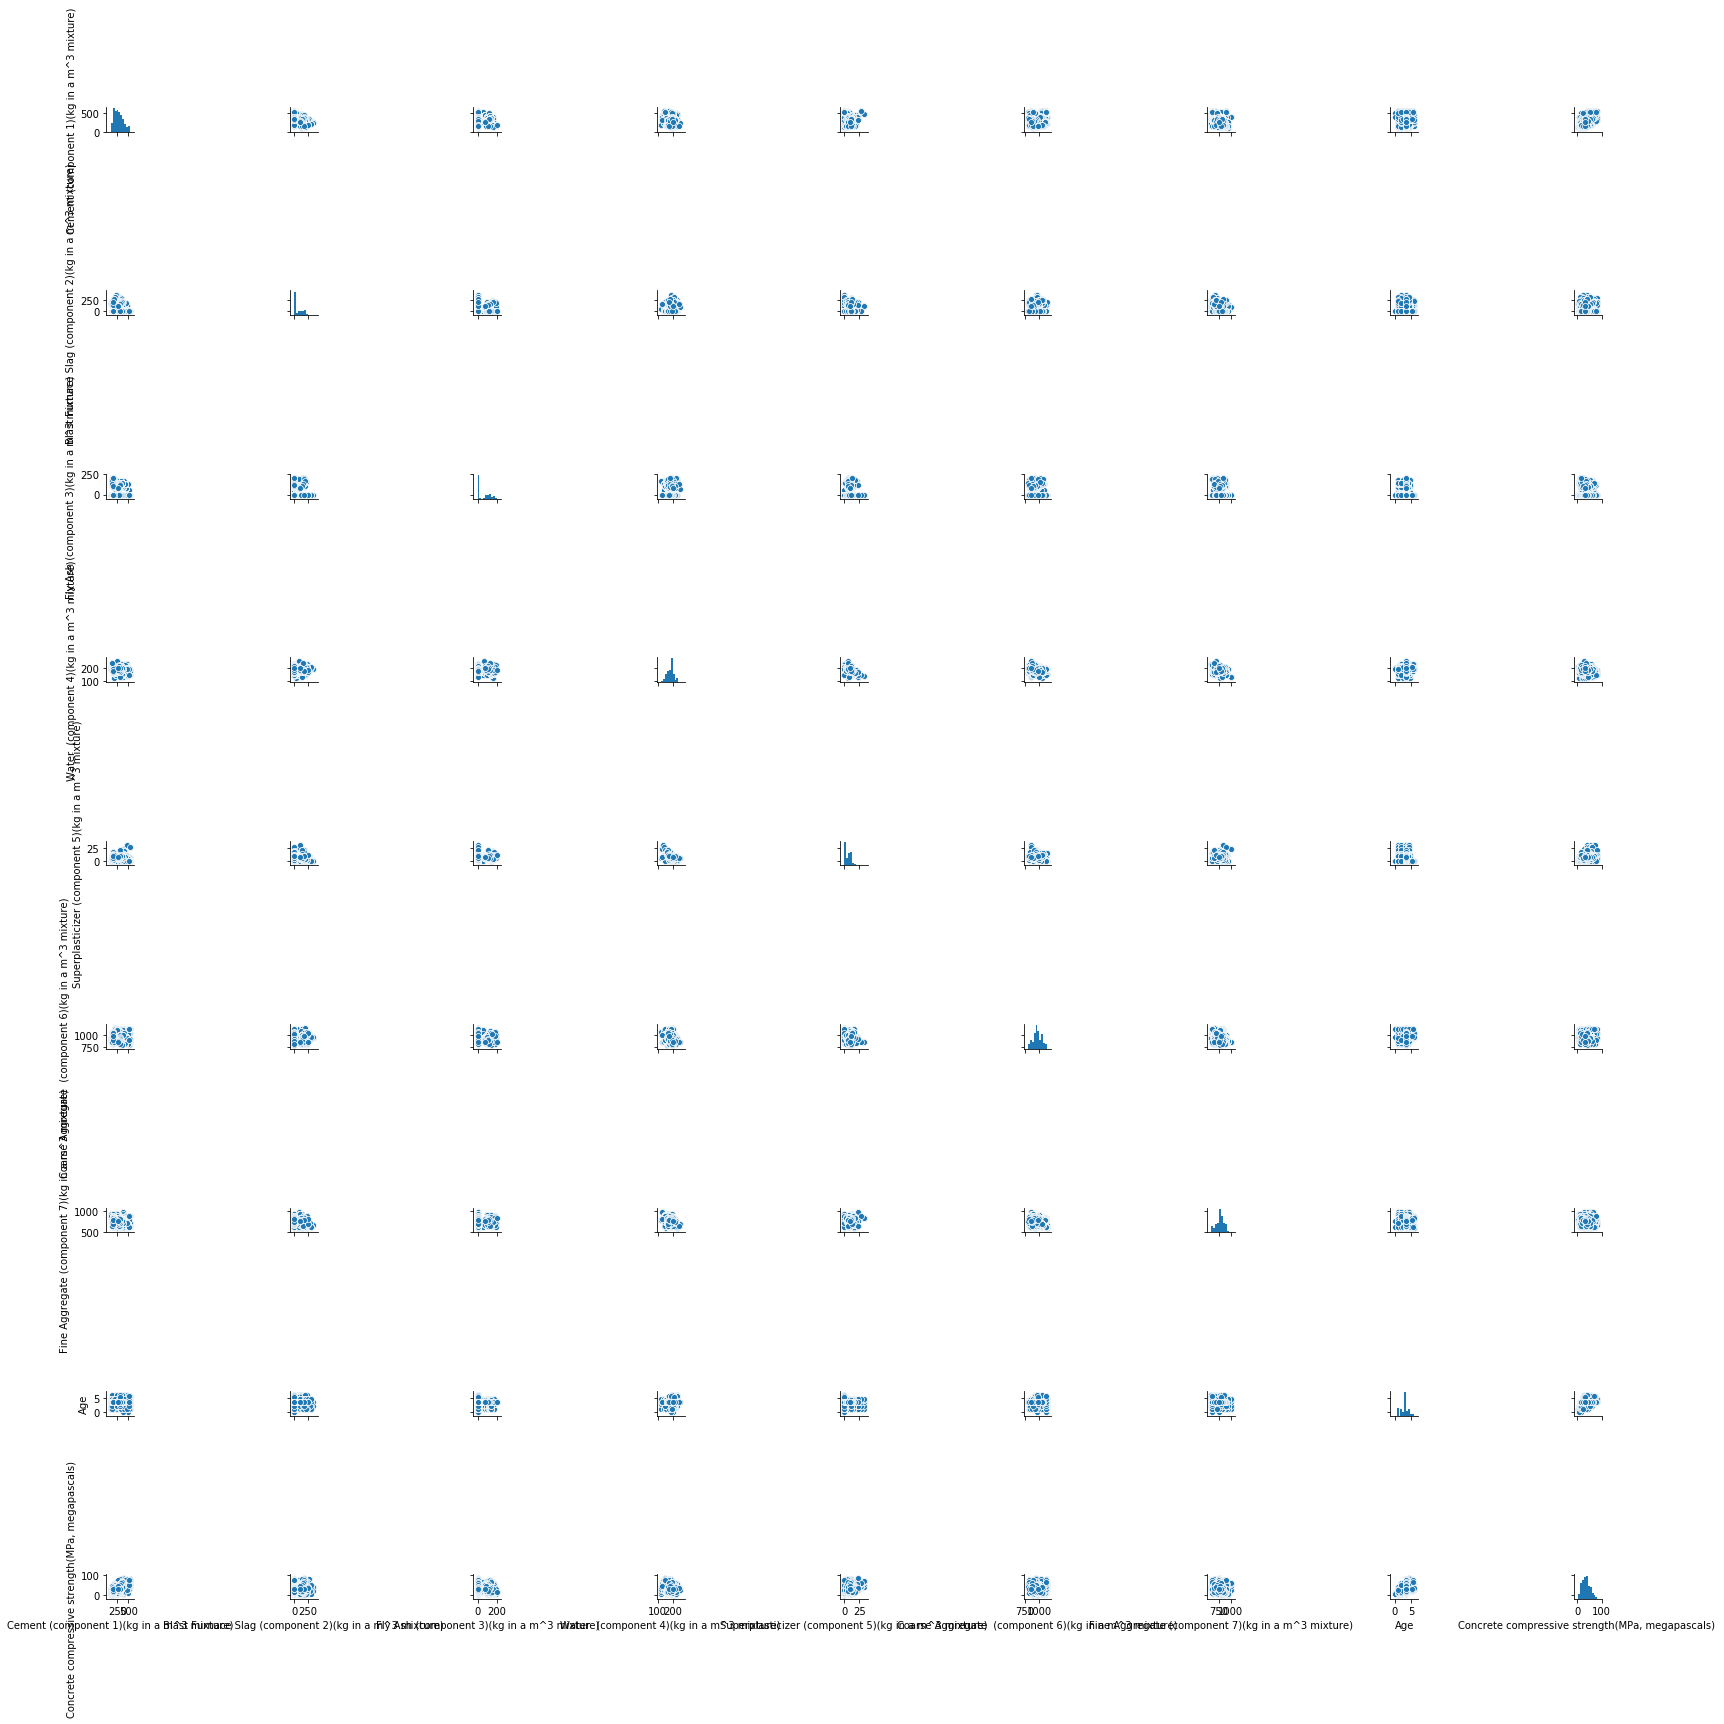

In [47]:
sb.pairplot(data)

In [48]:
from sklearn.impute import SimpleImputer 

In [49]:
imp=SimpleImputer(missing_values=0,strategy='mean')
imp=imp.fit(data)
dst=imp.transform(data.values)
dst

array([[540.        , 136.15867621, 120.2887931 , ..., 676.        ,
          3.33220451,  79.99      ],
       [540.        , 136.15867621, 120.2887931 , ..., 676.        ,
          3.33220451,  61.89      ],
       [332.5       , 142.5       , 120.2887931 , ..., 594.        ,
          5.59842196,  40.27      ],
       ...,
       [148.5       , 139.4       , 108.6       , ..., 780.        ,
          3.33220451,  23.7       ],
       [159.1       , 186.7       , 120.2887931 , ..., 788.9       ,
          3.33220451,  32.77      ],
       [260.9       , 100.5       ,  78.3       , ..., 761.5       ,
          3.33220451,  32.4       ]])

In [50]:
dst=pd.DataFrame(dst)
dst

,0,1,2,3,4,5,6,7,8
0,540.0,136.158676,120.288793,162.0,2.500000,1040.0,676.0,3.332205,79.99
1,540.0,136.158676,120.288793,162.0,2.500000,1055.0,676.0,3.332205,61.89
2,332.5,142.500000,120.288793,228.0,9.816897,932.0,594.0,5.598422,40.27
3,332.5,142.500000,120.288793,228.0,9.816897,932.0,594.0,5.899897,41.05
4,198.6,132.400000,120.288793,192.0,9.816897,978.4,825.5,5.886104,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.000000,90.300000,179.6,8.900000,870.1,768.3,3.332205,44.28
1026,322.2,136.158676,115.600000,196.0,10.400000,817.9,813.4,3.332205,31.18
1027,148.5,139.400000,108.600000,192.7,6.100000,892.4,780.0,3.332205,23.70
1028,159.1,186.700000,120.288793,175.6,11.300000,989.6,788.9,3.332205,32.77


In [51]:
y = dst.iloc[:,-1]

In [52]:
y.head()

0    79.99
1    61.89
2    40.27
3    41.05
4    44.30
Name: 8, dtype: float64

In [53]:
y.shape

(1030,)

In [54]:
x=dst.iloc[:,0:8]

In [55]:
x

,0,1,2,3,4,5,6,7
0,540.0,136.158676,120.288793,162.0,2.500000,1040.0,676.0,3.332205
1,540.0,136.158676,120.288793,162.0,2.500000,1055.0,676.0,3.332205
2,332.5,142.500000,120.288793,228.0,9.816897,932.0,594.0,5.598422
3,332.5,142.500000,120.288793,228.0,9.816897,932.0,594.0,5.899897
4,198.6,132.400000,120.288793,192.0,9.816897,978.4,825.5,5.886104
...,...,...,...,...,...,...,...,...
1025,276.4,116.000000,90.300000,179.6,8.900000,870.1,768.3,3.332205
1026,322.2,136.158676,115.600000,196.0,10.400000,817.9,813.4,3.332205
1027,148.5,139.400000,108.600000,192.7,6.100000,892.4,780.0,3.332205
1028,159.1,186.700000,120.288793,175.6,11.300000,989.6,788.9,3.332205


In [56]:
x.shape

(1030, 8)

In [57]:
y.shape

(1030,)

In [58]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=42)

In [59]:
x_train.shape

(803, 8)

In [60]:
x_test.shape

(227, 8)

In [61]:
y_train.shape

(803,)

In [62]:
y_test.shape

(227,)

In [63]:
lm=LinearRegression()

In [64]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [65]:
lm.score(x_train,y_train)

0.7764077121055183

In [66]:
lm.coef_

array([ 0.05950414,  0.03516376, -0.09140274, -0.47681791, -0.51941433,
       -0.06334476, -0.06519086,  8.53269588])

In [67]:
lm.intercept_

201.8881291080566

In [68]:
pred=lm.predict(x_test)

In [69]:
print('Predicted value and actual value',pred,y_test)

Predicted value and actual value [44.5434864  41.95388399 59.06480636 34.72414903 18.05620088 47.13138749
 31.61705356 53.33510099 34.67075388 50.01778786 36.77818364 17.20718489
 41.09652031 40.97940726 23.21146552 34.94648371 36.68048551 18.94421489
 36.36267491 26.58709444 37.61491496 37.03149377 46.97072247  9.90896801
 33.62583389 38.34050924  9.46375739 45.63277334 44.3382932  13.96332337
 43.41716426 40.05496812 47.90543023 53.606207   13.88831892 32.54784247
 35.35514875 45.72482596 12.34188496 45.77534511 17.380468    0.83046734
 33.32246631 48.66863295  8.6550182  59.8017154  52.5945692  52.91345099
 25.23238618  3.64489757 45.43363109 41.76093134 25.6340246  23.57354618
 55.28021557 34.82873817 28.75633979 12.48413945 35.89305167 23.95138305
 45.85656245 18.64066556 38.57541031 42.98849783 24.2251877  25.87677726
 38.63539021 25.99263129 33.99373645 25.59735193  9.392183   19.53551143
  3.08300263 36.71861586 35.4083559   9.84985734 45.46842087 54.2920227
 59.6195607   7.594

In [70]:
from sklearn.metrics import mean_squared_error,r2_score
print(mean_squared_error(pred,y_test))

52.23561676915724


In [71]:
def predicttest(testvalue):
    testvalue=testvalue.reshape(1,-1)
    t = lm.predict(testvalue)
    print(t)

In [72]:
testv = np.array([540.0,136.158676,120.288793,162.0,2.500000,1040.0,676.0,28.0])
predicttest(testv)

[278.2383615]
